<a href="https://colab.research.google.com/github/cyberone1812/CMUDeepLearning/blob/main/cmu_dele_week_2_ohours_12_5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Office Hours II

- Review `numpy` and `pytorch`
- Perceptron with `numpy` and `pytorch`
- Training a basic network with `pytorch`

[Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=1&seed=0.72721&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch

### Derivatives and Gradients for Optimization

Consider:

$$f(x) = x^2$$

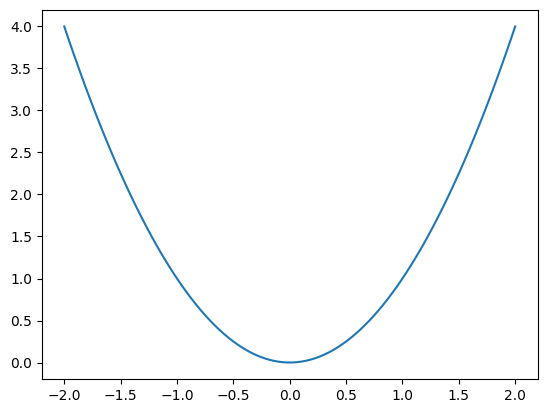

In [ ]:
def f(x): return x**2
x = np.linspace(-2, 2, 100)
plt.plot(x, f(x))

Consider:

$$f(x, y) = x^2 + y^2$$

$$f_{x} = 2x$$

$$f_{y} = 2y$$

$$< 2x, 2y >$$

In [ ]:
ax = plt.axes(projection = '3d')

In [ ]:
x = np.linspace(0, 3, 100)
y = 3*x + np.random.normal(size = len(x))
plt.scatter(x, y)

Consider:

$$f(\beta_0, \beta_1) = \frac{1}{n}\sum_{i = 1}^n (\beta_0 + \beta_1*x_i - y_i)^2$$

#### Perceptron

$$
{\displaystyle f(\mathbf {x} )={\begin{cases}1&{\text{if }}\ \mathbf {w} \cdot \mathbf {x} +b>0,\\0&{\text{otherwise}}\end{cases}}}$$

In [ ]:
from sklearn.datasets import make_classification, make_blobs

In [ ]:
### make a basic classification dataset
X, y = make_blobs(centers = 2, center_box=[-3, 3], random_state = 22)

In [ ]:
### Visualize it
plt.scatter(X[:, 0], X[:, 1], c = y)

In [ ]:
X[:5]

In [ ]:
X_train = X[:75]
X_test = X[75:]
y_train = y[:75]
y_test = y[75:]

In [ ]:
### Add Bias Term
ones = np.ones(shape = (75, 1))
Xb_train = np.concatenate((ones, X_train), axis = 1)
ones = np.ones(shape = (25, 1))
Xb_test = np.concatenate((ones, X_test), axis = 1)
Xb_train.shape, Xb_test.shape

In [ ]:
Xb_train[:5]

In [ ]:
### initial weights
w = np.array([0, 1, 2])

In [ ]:
### Find weighted sum
Xb_train@w

In [ ]:
### Make predictions
yhat = np.where(Xb_train@w > 0, 1, 0)

In [ ]:
yhat

In [ ]:
y_train

In [ ]:
### Evaluate predictions
sum(y_train == yhat)/len(y_train)

In [ ]:
### actual y
y_train

In [ ]:
### predicted y
yhat

#### Improving the Model

$$w_{i + 1} = w_i - lr*(y - yhat)*-x$$

In [ ]:
### update the weights
w = w - 0.1*(y_train - yhat)@-Xb_train

In [ ]:
w

In [ ]:
sum(np.where(Xb_train@w > 0, 1, 0) == y_train)/len(y_train)

In [ ]:
### do this repeatedly
w = np.array([0, 1, 2])
lr = 0.01
for epoch in range(100):
  weighted_sum = Xb_train@w
  yhat = np.where(weighted_sum > 0, 1, 0)
  w = w - lr*(y_train - yhat)@-Xb_train
  print(f'Accuracy {sum(yhat == y_train)/len(y_train): .2f} in epoch: {epoch}')
  test_preds = np.where(Xb_test@w > 0, 1, 0)
  print(f'Test Acc: {sum(y_test == test_preds)/len(y_test)}')
  #weighted sum


In [ ]:
### examine performance
yhat

In [ ]:
w

### Pytorch and Regression

In [ ]:
x = np.random.random_integers(low = 1, high = 30, size = 15)
y = 3*x + 4 + np.random.normal(size = len(x), scale = 3)

In [ ]:
plt.scatter(x, y)

In [ ]:
xt = torch.tensor(x)
yt = torch.tensor(y)

In [ ]:
xt

In [ ]:
yt

In [ ]:
### define the model
def model(x, w, b):
  return x*w + b

In [ ]:
### define our loss function -- mean squared error
def loss_fn(y, yhat):
  sq_diff = (y - yhat)**2
  return sq_diff.mean()

In [ ]:
### parameters
w = torch.ones(())
b = torch.zeros(())

In [ ]:
### yhat
yhat = model(xt, w, b)

In [ ]:
yhat

In [ ]:
## compute loss
loss = loss_fn(yt, yhat)

In [ ]:
loss

#### Updating Weights

In [ ]:
#derivative of loss
def dloss(yhat, y):
  diff_d = 2*(yhat - y)/yhat.size(0)
  return diff_d

In [ ]:
#derivative of model w/respect to w
def dmodel_dw(x, w, b):
  return x

In [ ]:
#d dbias
def dmodel_db(x, w, b):
  return 1.0

In [ ]:
#gradient function
def grad_func(y, x, yhat, w, b):
  dloss_m = dloss(yhat, y)
  dloss_dw = dloss_m*dmodel_dw(x, w, b)
  dloss_db = dloss_m*dmodel_db(x, w, b)
  return torch.stack([dloss_dw.sum(), dloss_db.sum()])

In [ ]:
#training loop
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    w, b = params
    yhat = model(x, w, b)
    loss = loss_fn(y, yhat)
    grad = grad_func(y, x, yhat, w, b)
    params = params - lr*grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [ ]:
#test it
training_loop(100, .001, torch.tensor([0, 0]), xt, yt)

In [ ]:
#scale inputs
plt.scatter(xt, yt)
plt.plot(xt, 3.2339*x + .1925, color = 'red')

#### Using `pytorch` for gradient computation

In [ ]:
#define the model
def model(x, w, b):
  return x*w + b

In [ ]:
#loss function
def loss_fn(y, yhat):
  diff_sq = (y - yhat)**2
  return diff_sq.sum()

In [ ]:
#parameters
params = torch.tensor([1.0, 0.0], requires_grad = True)

In [ ]:
params

In [ ]:
#loss
loss = loss_fn(yt, model(xt, *params))

In [ ]:
loss

In [ ]:
#pytorch gradient
params.grad is None

In [ ]:
#backward method
loss.backward()

In [ ]:
#gradient
params.grad

In [ ]:
### GRADIENTS ACCUMULATE!!!
if params.grad is not None:
  params.grad.zero_()

In [ ]:
#training loop
def training_loop(n_epochs, lr, params, x, y):
  for epoch in range(1, n_epochs + 1):
    if params.grad is not None:
      params.grad.zero_()
    yhat = model(x, *params)
    loss = loss_fn(y, yhat)
    loss.backward()
    with torch.no_grad():
      params -= lr * params.grad
    if epoch % 100 == 0:
      print(f'Epoch {epoch}, Loss {loss}')
  return params

In [ ]:
#test it
training_loop(5000, 1e-4, torch.tensor([1.0, 0.0], requires_grad = True), xt, yt)

In [ ]:
plt.scatter(xt, yt)
plt.plot(xt, 3.2*xt + .6691, color = 'red')

### `nn.Sequential` and `nn.Linear`

In [ ]:
import torch.nn as nn
import torch.optim as optim

In [ ]:
#the linear layer
linear_1 = nn.Linear(in_features=1, out_features=1 )

In [ ]:
#parameters
list(linear_1.parameters())

In [ ]:
xt = torch.tensor(xt, dtype = torch.float32)

In [ ]:
linear_1(xt[0].reshape(-1, 1))

In [ ]:
linear_1(xt.unsqueeze(1))

In [ ]:
#sample data
loss_fn = nn.MSELoss()

In [ ]:
yt = torch.tensor(yt, dtype = torch.float32)

In [ ]:
loss = loss_fn(yt[0], linear_1(xt[0].reshape(-1, 1)))

In [ ]:
optimizer = optim.SGD(linear_1.parameters(), lr = 0.1)

In [ ]:
optimizer.zero_grad()

In [ ]:
loss.backward()

In [ ]:
list(linear_1.parameters()) #original parameters

In [ ]:
optimizer.step() #update paramters with gradient descent

In [ ]:
list(linear_1.parameters()) #updated parameters